In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
file_path = 'C:/Users/Deepika/Documents/Sem-3/IDS/Project/dataset.csv'  
data = pd.read_csv(file_path)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_1972\867313972.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [5]:
print(" Column Names: ", data.columns)

 Column Names:  Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')


In [6]:
data.shape

# To make all the columns visible
pd.set_option('display.max_columns', None)


data.columns

data.dtypes

(data.isnull().sum()/data.shape[0])*100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

In [7]:
# Near Earth Object
data.neo.value_counts()

#Orbit Id
print(data.orbit_id.unique())
data.orbit_id.nunique()

# Equinox
data.equinox.value_counts()

# Class
print(data['class'].unique())
data['class'].nunique()

# Output Label
data.pha.value_counts(normalize = True)

data_v1 = data.drop(columns = ['id','pdes', 'name', 'prefix', 'equinox'], axis = 'columns', inplace=False)
data_v1.shape

# Exclude non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
                   spkid         H  diameter    albedo  diameter_sigma  \
spkid           1.000000  0.146075 -0.095362 -0.179656        0.023419   
H               0.146075  1.000000 -0.572648 -0.221658       -0.070651   
diameter       -0.095362 -0.572648  1.000000 -0.108880        0.337145   
albedo         -0.179656 -0.221658 -0.108880  1.000000       -0.080525   
diameter_sigma  0.023419 -0.070651  0.337145 -0.080525        1.000000   
epoch           0.006816 -0.175712  0.058475  0.094071       -0.005169   
epoch_mjd       0.006816 -0.175712  0.058475  0.094071       -0.005169   
epoch_cal       0.006999 -0.176349  0.058539  0.094114       -0.005120   
e               0.010951  0.345334 -0.050649 -0.020403       -0.016542   
a               0.000116 -0.032187  0.146799 -0.114484        0.206718   
q              -0.002115 -0.437429  0.

In [8]:
# Drop correlated columns
data_v1 = data_v1.drop(columns = ['epoch_mjd', 'epoch_cal', 'ad', 'tp_cal', 'per_y', 'sigma_ad', 'sigma_tp', 'sigma_ma'])

# Analysing missing pha
data_v1[data_v1.pha.isna()].isna().sum()

data_v2 = data_v1[data_v1.pha.notna()]
data_v2 = data_v2.drop(columns = ['diameter', 'albedo', 'diameter_sigma'])

data_v2.shape

# Impute null values in H column with mean
data_v2.H.fillna(np.mean(data_v2.H), inplace=True)

data_v2 = data_v2[data_v2.sigma_per.notna()]
data_v2 = data_v2[data_v2.ma.notna()]

data_v2.shape

(938597, 29)

In [9]:

# DATA PREPROCESSING

data_v2.head()

# orbit ID
print(data_v2.orbit_id.nunique())
orbits = data_v2.orbit_id.value_counts().loc[lambda x: x<20].index.to_list()

print(len(orbits))

data_v2.loc[data_v2.orbit_id.isin(orbits), 'orbit_id'] = 'other'

# Class
data['class'].nunique()

# Reset the index
data_v2 = data_v2.reset_index(drop=True)

# Normalizing the data
subset = data_v2[data_v2.columns[~data_v2.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]

from sklearn import preprocessing
normalize = preprocessing.MinMaxScaler()
scaled = normalize.fit_transform(subset)
scaled = pd.DataFrame(scaled, columns = subset.columns)
data_final = pd.concat([data_v2[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']], scaled], axis=1)

data_v2.shape, data_final.shape

data_final.head(3)

#One hot encoding
data_final = pd.get_dummies(data_final, columns = ['neo',  'orbit_id', 'class'])

data_final.head(3)

data_final.shape

525
392


(938597, 174)

In [10]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [11]:


# Select relevant features for prediction
features = ['a', 'e', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per']
target = ['ad']  # Predicting the apoapsis distance

# Drop rows with missing values
df = data.dropna(subset=features + target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




Mean Squared Error: 0.3260273319306385


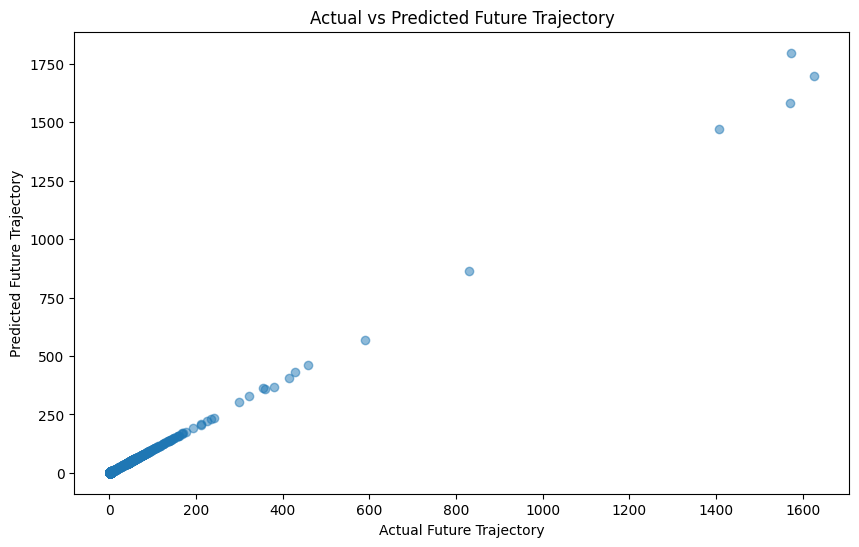

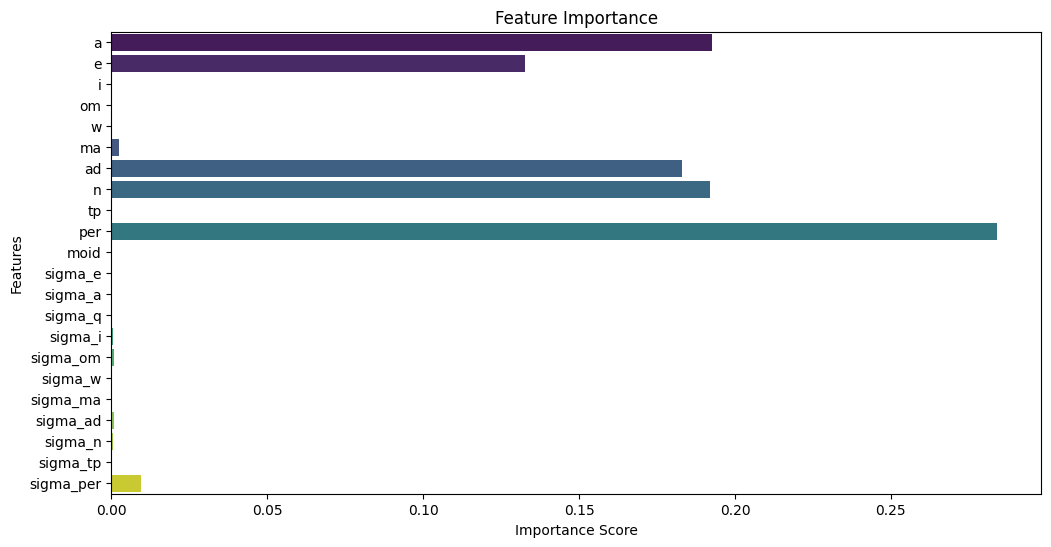

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Future Trajectory')
plt.xlabel('Actual Future Trajectory')
plt.ylabel('Predicted Future Trajectory')
plt.show()

# Feature Importance Plot
feature_importance = rf_model.feature_importances_
feature_names = features

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names, orient='h', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


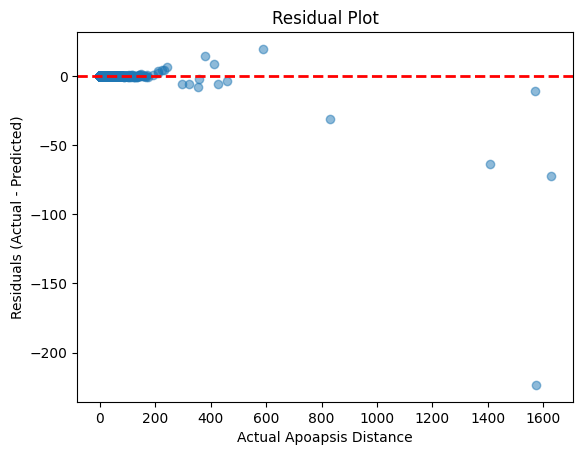

In [18]:
# Residual plot
residuals = y_test.values.ravel() - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Apoapsis Distance')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.show()


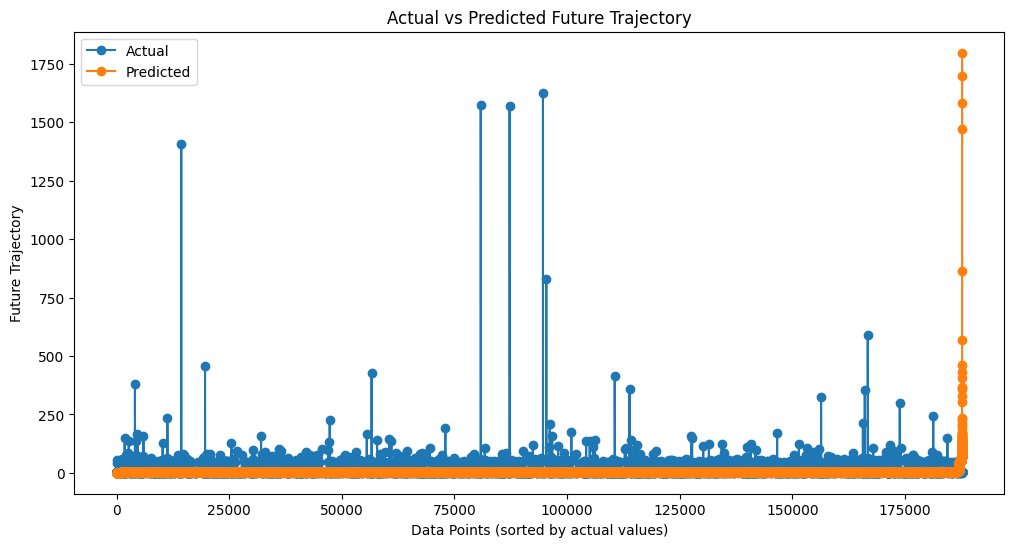

In [24]:
import numpy as np

# Sort the indices to make sure the line plot is in ascending order
sorted_indices = np.argsort(y_test)

# Plotting the actual vs predicted values as a line plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual', marker='o')
plt.plot(np.arange(len(y_pred)), np.sort(y_pred), label='Predicted', marker='o')
plt.title('Actual vs Predicted Future Trajectory')
plt.xlabel('Data Points (sorted by actual values)')
plt.ylabel('Future Trajectory')
plt.legend()
plt.show()
